In [7]:
ls -lh /n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno

total 416K
drwxrwsr-x 2 was966 zitnik 256 Aug 18 11:43 dat.Chen.RData/
drwxrwsr-x 2 was966 zitnik 395 Aug 18 11:43 dat.Cho.RData/
drwxrwsr-x 2 was966 zitnik 487 Aug 18 11:43 dat.Gide.RData/
drwxrwsr-x 2 was966 zitnik 478 Aug 18 11:43 dat.Huang.RData/
drwxrwsr-x 2 was966 zitnik 481 Aug 18 11:43 dat.Hwang.RData/
drwxrwsr-x 2 was966 zitnik 395 Aug 18 11:43 dat.Kim.RData/
drwxrwsr-x 2 was966 zitnik 597 Aug 18 11:44 dat.Liu.RData/
drwxrwsr-x 2 was966 zitnik 660 Aug 18 11:44 dat.Miao.RData/
drwxrwsr-x 2 was966 zitnik 369 Aug 18 11:44 dat.Nathanson_pre.RData/
drwxrwsr-x 2 was966 zitnik 721 Aug 18 11:44 dat.Prat.RData/
drwxrwsr-x 2 was966 zitnik 453 Aug 18 11:44 dat.Riaz.RData/
drwxrwsr-x 2 was966 zitnik 569 Aug 18 11:44 dat.Snyder.RData/
drwxrwsr-x 2 was966 zitnik 476 Aug 18 11:44 dat.VanAllen.RData/


In [8]:
ls -lh /n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno/dat.VanAllen.RData/

do_ypcall: clnt_call: RPC: Timed out
total 68M
-rw-rw-r-- 1 was966 zitnik  245 Aug 18 11:44 age.txt
-rw-rw-r-- 1 was966 zitnik 730K Aug 18 11:44 genes.txt
-rw-rw-r-- 1 was966 zitnik  154 Aug 18 11:44 indNR.txt
-rw-rw-r-- 1 was966 zitnik   75 Aug 18 11:44 indR.txt
-rw-rw-r-- 1 was966 zitnik  535 Aug 18 11:44 ml.txt
-rw-rw-r-- 1 was966 zitnik  19M Aug 18 11:44 mRNA.norm3.txt
-rw-rw-r-- 1 was966 zitnik  20M Aug 18 11:44 mRNA.rank2.txt
-rw-rw-r-- 1 was966 zitnik  21M Aug 18 11:44 mRNA.rank.txt
-rw-rw-r-- 1 was966 zitnik 7.6M Aug 18 11:44 mRNA.txt
-rw-rw-r-- 1 was966 zitnik  203 Aug 18 11:44 pfs.status.txt
-rw-rw-r-- 1 was966 zitnik  267 Aug 18 11:44 pfs.txt
-rw-rw-r-- 1 was966 zitnik  203 Aug 18 11:44 response.txt
-rw-rw-r-- 1 was966 zitnik  375 Aug 18 11:44 samples.txt
-rw-rw-r-- 1 was966 zitnik  357 Aug 18 11:44 sex.txt
-rw-rw-r-- 1 was966 zitnik  455 Aug 18 11:44 stage.txt
-rw-rw-r-- 1 was966 zitnik  203 Aug 18 11:44 status.txt
-rw-rw-r-- 1 was966 zitnik  355 Aug 18 11:44 survival.txt


In [9]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

rdata = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/RData2csv/immuno/dat.VanAllen.RData'

In [10]:
df_mRNA = pd.read_csv(os.path.join(rdata, 'mRNA.txt'), sep='\t')
genes = pd.read_csv(os.path.join(rdata, 'genes.txt'), sep='\t').x.to_frame(name='genes')
df_mRNA.index = genes.genes
df_mRNA.shape

(48644, 42)

In [11]:
df_mRNA = df_mRNA.dropna()

In [12]:
df_mRNA.shape

(23749, 42)

In [13]:
samples = pd.read_csv(os.path.join(rdata, 'samples.txt'), sep='\t').x.to_frame(name='samples')
#flag = pd.read_csv(os.path.join(rdata, 'flag.txt'), sep='\t').x.to_frame(name='flag')
response= pd.read_csv(os.path.join(rdata, 'response.txt'), sep='\t').x.to_frame(name='response')
flag = response.response.to_frame(name='flag')
age = pd.read_csv(os.path.join(rdata, 'age.txt'), sep='\t').x.to_frame(name='age')
gender = pd.read_csv(os.path.join(rdata, 'sex.txt'), sep='\t').x.to_frame(name='gender')
#treatment = pd.read_csv(os.path.join(rdata, 'treatment.txt'), sep='\t').x.to_frame(name='treatment')
survival = pd.read_csv(os.path.join(rdata, 'survival.txt'), sep='\t')
survival.columns = ['time','status']

samples['patients'] = df_mRNA.columns
df_samples = samples.join(flag).join(response).join(age).join(gender).join(survival).set_index('samples')

In [14]:
captureSize = 35.8 #for tmb claculation
VC_NONSYNONYMOUS_LIST = ['Frame_Shift_Del',
                         'Frame_Shift_Ins',
                         'In_Frame_Del',
                         'In_Frame_Ins',
                         'Missense_Mutation',
                         'Nonsense_Mutation',
                         'Splice_Site',
                         'Nonstop_Mutation',
                         'Splice_Region']

truncate_mut_LIST = ['Nonsense_Mutation', 'Frame_Shift_Ins','Frame_Shift_Del','Splice_Site']
nontruncate_mut_LIST = ['Missense_Mutation','In_Frame_Del', 'In_Frame_Ins','Nonstop_Mutation']

mut = pd.read_excel('./raw/tables1.mutation_list_all_patients.xlsx')

mut['nansynonymous_mut_flag'] = mut.Variant_Classification.isin(VC_NONSYNONYMOUS_LIST)
mut['truncate_mut_flag'] = mut.Variant_Classification.isin(truncate_mut_LIST)
mut['nontruncate_mut_flag'] = mut.Variant_Classification.isin(nontruncate_mut_LIST)


I_calculated_TMB1 = mut.groupby('patient').nansynonymous_mut_flag.sum()
I_calculated_TMB2 = mut.groupby('patient').apply(lambda x:x.truncate_mut_flag.sum()*2+x.nontruncate_mut_flag.sum())

/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


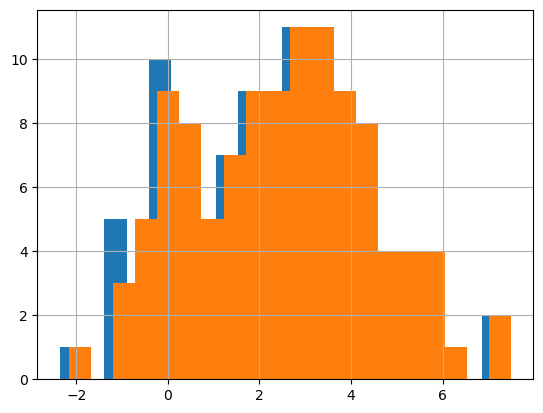

In [15]:
#for tmb claculation
tmb1 = np.log2(I_calculated_TMB1/captureSize)
tmb2 = np.log2(I_calculated_TMB2/captureSize)

tmb1.hist(bins=20)
tmb2.hist(bins=20)

tmb = tmb1.to_frame('tmb.dan').join(tmb2.to_frame(name = 'tmb.wang'))
df_samples = df_samples.join(tmb)
df_samples = df_samples.set_index('patients')
df_samples.index.name = 'samples'

In [32]:
df_samples['patient'] = df_samples.index.map(lambda x:x.split('-')[1].split('_')[1])

In [33]:
dfs2 = pd.read_excel('./raw/tables2_revised.xlsx', sheet_name='transcriptome analysis (n=42)')

/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [35]:
df_samples['RECIST'] = df_samples.patient.map(dfs2.set_index('patient').RECIST)

In [37]:
df_samples.to_csv('./processed/samples.csv')
df_mRNA.to_csv('./processed/abundance.csv')